# Modelling the orbits of Earth and Mars#







Assuming that the orbits of Mars and Earth are on the same plane (no inclination relative to the ecliptic), they are fully described by the following parameters. This dataset was provided by my Astrophysics professor as part of an assignment.
 
| planet | a (AU) |    e      | $\varpi$ (deg)|  $P$ (days)  | $t_0$           |
|--------|--------|-----------|---------------|--------------|-----------------|
| Earth  |  1.00  | 0.017     |   103         |    365       | Jan 3, 2018     |
| Mars   |  1.52  | 0.093     |   336         |    687       | Sep 16, 2018    |

where $a$ is the semimajor axis, $e$ is the eccentricity, $\varpi$ the longitude of perihelion (angle of perihelion relative to a fixed direction in the sky: the Vernal Equinox), $P$ is the orbital period, and $t_0$ is the time of perihelion closest to today.

 



All scientific constants were obtained from the first entry when searched on Google.

The first step is to write a function that returns the polar angle ($\theta$) relative to the vernal equinox as a function of time (in days, relative to Jan 1, 2018), for both Earth and Mars. Plot your result in units of radians for the angle and days for time (both curves in the same graph, labeled), extending over two Martian orbits since Jan 1, 2018. 

To do this, $\frac{d\theta}{dt}$ was assumed to be $0$. Therefore, the rate of change of $\theta$ is a constant slope and we can easily derive the equation of a line based on our data. There are $2\pi$ radians in an ellipse, and therefore at a constant rate, $\frac{2\pi}{P}$ radians in one day for a given planet, where P is the orbital period of the planet. This will then be our slope. This gives us the equation $\begin{equation} \theta(T) = \frac{2\pi}{P}(T) + b \end{equation}$ where $b$ is the y-intercept of the line and $T$ is the time in days. We are given $t_0$ and $\varpi$ in the data and we can use them to find $b$ as they correspond to a point on the line. Using this method after converting all degrees to radians we arrive at 2 equations for the Polar Angle as a Function of Time for Earth and Mars seen below.

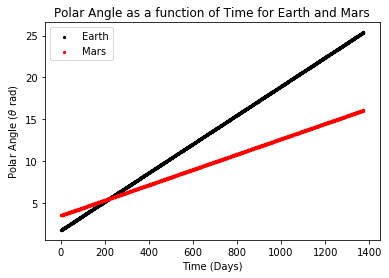

In [1]:
import numpy as np              #import modules 
import matplotlib.pyplot as plt 

pi = 3.14159265                 #pi constant
x = np.linspace(1,2*687,2*687)  #create linspace for number of days

def t1(x):
    return (x)*(1/365)*(2*pi) +103*pi/180 -6*pi/365    #define the functions for polar angle of Earth and Mars
def t2(x):
    return (x)*(1/687)*(2*pi) +336*pi/180 -516*pi/687

ax1 = plt.subplot()                                    #plot the results
ax1.scatter(x,t1(x), label='Earth', color='k', s=5)
ax1.scatter(x,t2(x), label='Mars', color='r', s=5)
plt.xlabel('Time (Days)')
plt.ylabel(r'Polar Angle ($\theta$ rad)')
plt.title('Polar Angle as a function of Time for Earth and Mars')
ax1.legend()
plt.show()

Now we want to write a function that returns the orbital distance from the Sun ($\approx$ ellipse focus) as a function of time, for both Earth and Mars. Then we can plot our results for approximately two Martian orbits. 

We can simply substitute the function we were able to derive from earlier into the equation for the orbital distance of an ellipse in polar coordinates. This equation is given as $\begin{equation} r(\theta) = \frac{a(1-\epsilon^2)}{1+\epsilon cos\theta}\end{equation}$. I used this equation to find the orbital distance from the sun as a function of time for Earth and Mars.

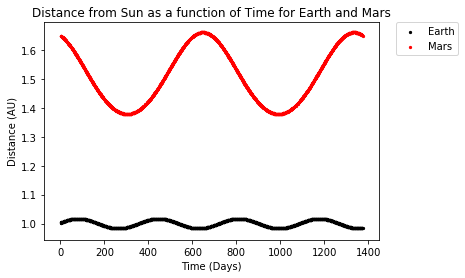

In [2]:
a1 = 1               #constants were gathered from data
a2 = 1.52
e1 = 0.017
e2 = 0.093

def r1(t1):                       #orbital distance function for Earth
    numer = a1*(1-e1**2)            
    denom = (1+e1*np.cos(t1(x)))
    return numer/denom

def r2(t2):
    numer = a2*(1-e2**2)          #orbital distance function for Mars
    denom = (1+e2*np.cos(t2(x)))
    return numer/denom

ax2 = plt.subplot()               #plot the results 
ax2.scatter(x,r1(t1), label='Earth', color='k', s=5)
ax2.scatter(x,r2(t2), label='Mars', color='r', s=5)
plt.xlabel('Time (Days)')
plt.ylabel('Distance (AU)')
plt.title('Distance from Sun as a function of Time for Earth and Mars')
ax2.legend(bbox_to_anchor=(1.05, 1), loc='best', borderaxespad=0.)
plt.show()

Now I want to compute the distance between Earth and Mars as a function of time and plot it. Using the results from earlier we can express the position of each planet in Cartesian coordinates (x,y) as a function of time, and then compute the distance between the two positions in this coordinate system.

Here, we first convert from polar coordinates to cartesian coordinates using the handy equations $\begin{equation} r = xcos\theta \end{equation}$ and $\begin{equation} r = ysin\theta \end{equation}$. Then, to find the distance between the planets in cartesian coordinates, we have to use the pythagorean theorem on the differences between the coordinates. $\begin{equation} Difference = Z = \sqrt{(y2-y1)^2 + (x2-x1)^2} \end{equation}$ was then used and the resulting graph of $Z$ as a function of time is shown below.

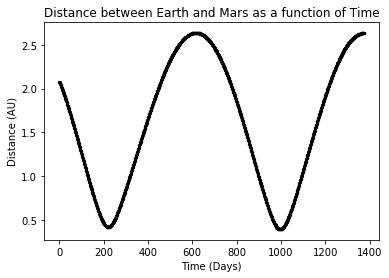

In [3]:
x1 = r1(t1)*np.cos(t1(x))       #converting polar coordinates to cartesian coordinates
x2 = r2(t2)*np.cos(t2(x))
y1 = r1(t1)*np.sin(t1(x))
y2 = r2(t2)*np.sin(t2(x))

z = np.sqrt((y2-y1)**2+(x2-x1)**2)     #calculating the difference between earth and mars in cartesian coordinates

ax4 = plt.subplot()                    #plotting the difference as a function of time
ax4.scatter(x,z, color='k', s=5)
plt.xlabel('Time (Days)')
plt.ylabel('Distance (AU)')
plt.title('Distance between Earth and Mars as a function of Time')
plt.show()

Using what we've found, we can gather a few observations from the model. 

By including a line for the minimum value of our difference function, we can show that the troughs of the function reach the minimum line at around 200 days (late July/early August 2018) and around 1000 days (late September/early October 2020). As well, we can extract the exact day using Python for confirmation. The distance of closest approach was therefore reached 220 days after January 1 2018 (late July/early August 2018) and will be reached 997 days after January 1 2018 (late September/early October 2020).

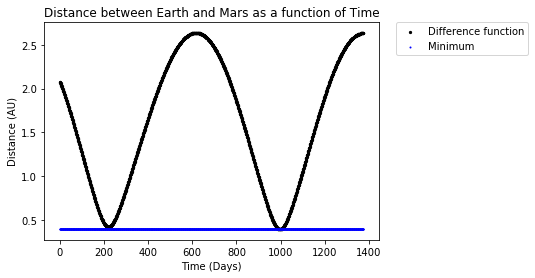

The distance of closest approach is reached first 220 days from January 1, 2018.
The distance of closest approach is reached second 996 days from January 1, 2018.


In [6]:
ax4 = plt.subplot()                                              #plotting distance as function of time with minimum line
ax4.scatter(x,z, label='Difference function', color='k', s=5)
ax4.scatter(x,np.min(z)*x/x,label='Minimum', color='b', s=1)
plt.xlabel('Time (Days)')
plt.ylabel('Distance (AU)')
plt.title('Distance between Earth and Mars as a function of Time')
ax4.legend(bbox_to_anchor=(1.05,1), loc='best', borderaxespad=0.)
plt.show()

from scipy.signal import argrelextrema #function that gives the x values of local extrema
tmin = argrelextrema(z,np.less)        #calculate the time reached for local minimums

print('The distance of closest approach is reached first', tmin[0][0], 'days from January 1, 2018.') #print results
print('The distance of closest approach is reached second', tmin[0][1], 'days from January 1, 2018.')

We can also find the minimum and maximum distance between Earth and Mars by finding the minimum and maximum values of the difference function.

In [7]:
dmin = np.min(z)       #minimum
dmax = np.max(z)       #maximum

dminkm = dmin*149598000   #convert to km
dmaxkm = dmax*149598000   #convert to km

print('The minimum distance between Earth and Mars is', dmin, 'AU or', dminkm, 'Km.')  #print results
print('The maximum distance between Earth and Mars is', dmax, 'AU or', dmaxkm, 'Km.')

The minimum distance between Earth and Mars is 0.395809375352 AU or 59212290.9339 Km.
The maximum distance between Earth and Mars is 2.6363368927 AU or 394390726.474 Km.
